## 1. 단순 회귀분석

In [1]:
X = [32, 64, 96, 118, 126, 144, 152, 158]
y = [17, 24, 62, 49, 52, 105, 130, 125]

import numpy as np
A = np.column_stack((X, np.ones((8))))
B = np.array(y)

A

array([[ 32.,   1.],
       [ 64.,   1.],
       [ 96.,   1.],
       [118.,   1.],
       [126.,   1.],
       [144.,   1.],
       [152.,   1.],
       [158.,   1.]])

In [2]:
np.linalg.inv(A.T @ A) @ A.T @ B

array([  0.87962664, -27.35846347])

In [3]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

print(f'slope: {slope}')
print(f'intercept: {intercept}')
print(f'r_value: {r_value}')
print(f'p_value: {p_value}')
print(f'std_err: {std_err}')

slope: 0.8796266379465087
intercept: -27.3584634715491
r_value: 0.89008928103186
p_value: 0.003051790677096642
std_err: 0.18388671751663876


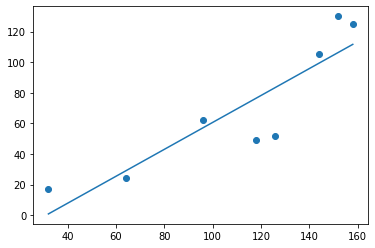

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, y)
plt.plot(X, slope*np.array(X) + intercept, '-')
plt.show()

In [5]:
fit = np.polyfit(X, y, 1)
fit
# 일차방정식의 경사 및 절편

array([  0.87962664, -27.35846347])

In [6]:
# 도출한 fit을 바탕으로 일차방정식 변환
func = np.poly1d(fit)
func(50)

16.6228684257764

In [7]:
# 이차방정식 생성
fit2 = np.polyfit(X, y, 2)
func2 = np.poly1d(fit2)

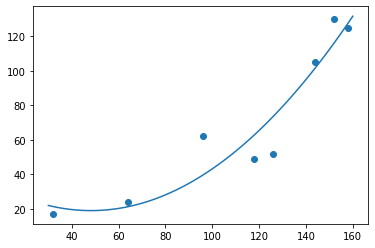

In [8]:
plt.scatter(X, y)
sample_X = np.linspace(30, 160, 100)
plt.plot(sample_X, func2(sample_X), '-')
plt.show()

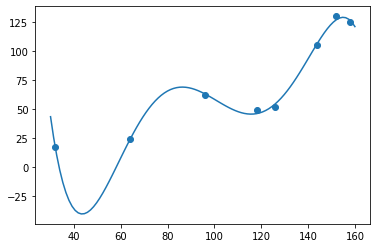

In [9]:
def draw_polyfit(X, y, deg=1):
    fit = np.polyfit(X, y, deg)
    func = np.poly1d(fit)
    plt.scatter(X, y)
    x_sample = np.linspace(30, 160, 100)
    plt.plot(x_sample, func(x_sample))
    plt.show()

draw_polyfit(X, y, 5)

## 2. 포뮬러를 이용한 회귀식

In [10]:
import pandas as pd

df = pd.DataFrame(np.c_[X, y], columns=['X', 'y'])
df

,X,y
0,32,17
1,64,24
2,96,62
3,118,49
4,126,52
5,144,105
6,152,130
7,158,125


In [11]:
# 포뮬러 라이브러리를 이용한 일반 선형회귀식 도출
# 절편, 기울기 도출
from statsmodels.formula.api import ols
model = ols('y ~ X', data=df)
res = model.fit()
res.params

Intercept   -27.358463
X             0.879627
dtype: float64

In [12]:
import statsmodels.api as sm
model = sm.OLS.from_formula('y ~ X', data=df)
res = model.fit()
res.params

Intercept   -27.358463
X             0.879627
dtype: float64

In [13]:
# 상수항을 포함하지 않는 3차방정식의 선형회귀식
model2 = ols('y ~ X + I(X**2) + I(X**3) -1', data=df)
res2 = model2.fit()
res2.params

X            1.005637
I(X ** 2)   -0.013981
I(X ** 3)    0.000082
dtype: float64

In [14]:
pred = res2.predict(df.X)
pred

0     20.546081
1     28.554576
2     40.121998
3     58.503665
4     68.513031
5     99.357248
6    117.343957
7    132.781779
dtype: float64

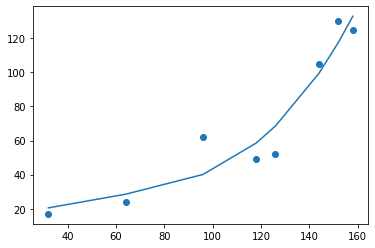

In [15]:
plt.scatter(X, y)
plt.plot(X, pred)
plt.show()

## 3. 정규화 선형회귀

In [24]:
# statsmodels
import numpy as np
n_samples = 30
np.random.seed(0)

X = np.sort(np.random.rand(n_samples))
y = np.sin(2*np.pi * X) + np.random.randn(n_samples)*0.1

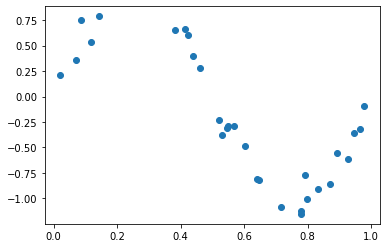

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, y)
plt.show()

In [27]:
import pandas as pd
df = pd.DataFrame(np.c_[X, y], columns=['x', 'y'])
df.head()

,x,y
0,0.020218,0.213138
1,0.071036,0.357444
2,0.087129,0.747487
3,0.118274,0.531167
4,0.143353,0.788347


In [31]:
from statsmodels.formula.api import ols

model = ols('y ~ x', data=df)
res = model.fit()
res.params

Intercept    0.713959
x           -1.642204
dtype: float64

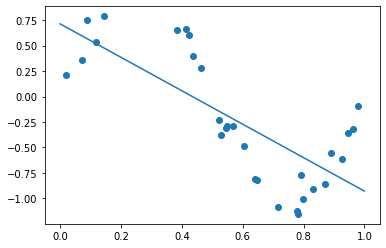

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, y)
xx = np.linspace(0, 1, 1000)
plt.plot(xx, res.predict({'x':xx}))
plt.show()

In [34]:
# 정규화를 하지 않는 회귀모형
from statsmodels.formula.api import ols

model9 = ols('y ~ x + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) + I(x**7) + I(x**8) + I(x**9)', data=df)
res9 = model9.fit()
res9.params

Intercept       -0.169863
x               25.735773
I(x ** 2)     -428.141683
I(x ** 3)     3866.723114
I(x ** 4)   -18340.939663
I(x ** 5)    49326.072543
I(x ** 6)   -78884.743070
I(x ** 7)    74538.645149
I(x ** 8)   -38453.132189
I(x ** 9)     8350.254985
dtype: float64

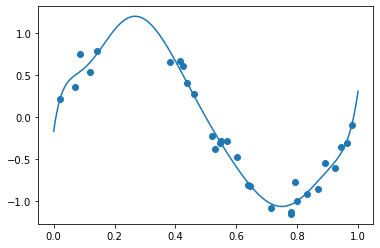

In [35]:
plt.scatter(X, y)
plt.plot(xx, res9.predict({'x':xx}))
plt.show()

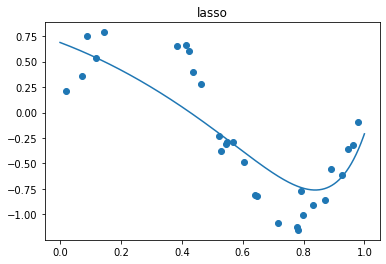

Intercept    0.687949
x           -1.129134
I(x ** 2)   -1.124878
I(x ** 3)    0.000000
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.000000
I(x ** 8)    0.281484
I(x ** 9)    1.075281
dtype: float64


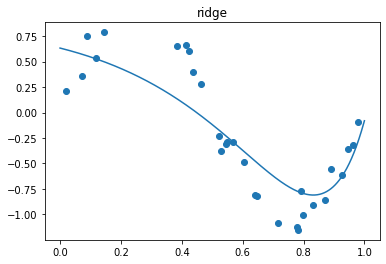

[ 0.63308745 -0.75705866 -1.07056551 -0.76835135 -0.35530367  0.0121939
  0.29917825  0.50969248  0.65793698  0.75851865]


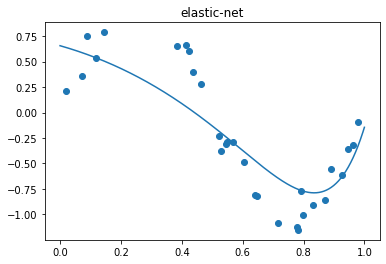

Intercept    0.656203
x           -0.849745
I(x ** 2)   -1.262902
I(x ** 3)   -0.425687
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.304049
I(x ** 8)    0.631908
I(x ** 9)    0.801206
dtype: float64


In [48]:
# Lasso, Ridge, Elastic Net 회귀모형
L1_wt_dict = {'lasso':1, 'ridge':0, 'elastic-net':0.5}

for name, value in L1_wt_dict.items():
    res9_regularized = model9.fit_regularized(L1_wt=value, alpha=0.01)

    plt.title(name)
    plt.scatter(X, y)
    plt.plot(xx, res9_regularized.predict({'x':xx}))
    plt.show()
    
    print(res9_regularized.params)

In [49]:
# scikit-learn 정규화 회귀모형
# 1. LinearRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [55]:
np.random.seed(0)
n_samples = 30

x = np.sort(np.random.rand(n_samples))
y = np.sin(2*np.pi * x) + np.random.randn(n_samples) * 0.1
x = x[:, np.newaxis]

In [56]:
def plot_model(model):
    plt.scatter(x, y)
    a = np.linspace(0, 1, 1000)
    plt.plot(a, model.predict(a[:, np.newaxis]))
    plt.show()

[ 0.00000000e+00  2.57357731e+01 -4.28141684e+02  3.86672312e+03
 -1.83409397e+04  4.93260726e+04 -7.88847431e+04  7.45386452e+04
 -3.84531322e+04  8.35025499e+03]


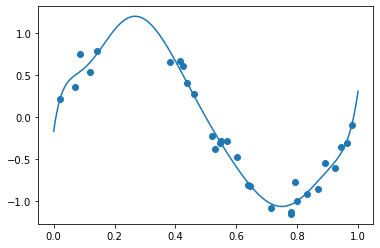

In [61]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(9)
model = make_pipeline(poly, LinearRegression()).fit(x, y)
print(model.steps[1][1].coef_)
plot_model(model)

[ 0.         -0.07668852 -2.44096313 -0.         -0.          0.
  0.          0.          0.          1.88188725]


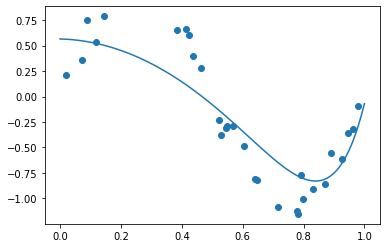

In [62]:
from sklearn.linear_model import Lasso

model = make_pipeline(poly, Lasso(alpha=0.01)).fit(x, y)
print(model.steps[1][1].coef_)
plot_model(model)

[ 0.          1.51430399 -3.90160797 -2.6359859  -0.41526792  1.07530175
  1.64913273  1.52026782  0.94651401  0.13299614]


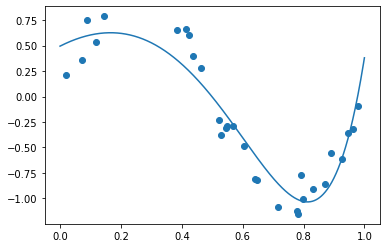

In [63]:
from sklearn.linear_model import Ridge

model = make_pipeline(poly, Ridge(alpha=0.01)).fit(x, y)
print(model.steps[1][1].coef_)
plot_model(model)

[ 0.         -0.83768018 -1.23944649 -0.50166684 -0.          0.
  0.          0.30382246  0.62459231  0.84262899]


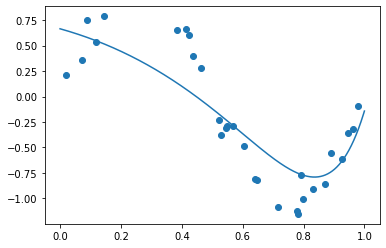

In [66]:
from sklearn.linear_model import ElasticNet

model = make_pipeline(poly, ElasticNet(alpha=0.01, l1_ratio=0.5)).fit(x, y)
print(model.steps[1][1].coef_)
plot_model(model)